## Régression linéaire sur le dataset Bostong Housing

### Chargement des librairies principales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données

In [2]:
#Chargement des données
df = pd.read_csv("/content/drive/MyDrive/Test Pratique-Novalitix AI Lab/Prédiction du Prix des Maisons/housing.csv")

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


## Pré-traitement des Features

In [5]:
# vérification des valeurs manquantes dans toutes les colonnes
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Aucune valeur manquante.**

### Visualisation de données

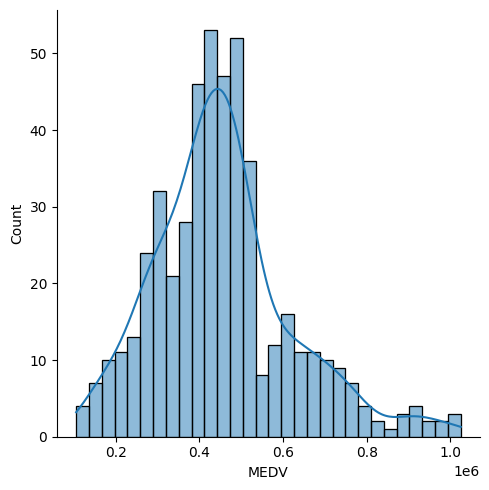

In [6]:
sns.displot(data=df,x='MEDV', bins=30,kde=True);


### Matrice de corrélation

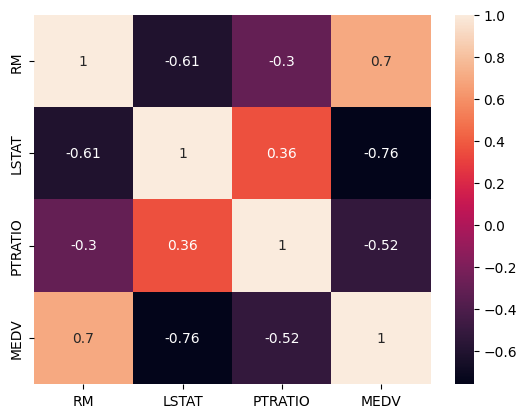

In [7]:
# calculer la corrélation par paire pour toutes les colonnes
correlation_matrix = df.corr().round(2)

# utiliser la fonction heatmap de seaborn pour tracer la matrice de corrélation
# annot = True pour imprimer les valeurs à l'intérieur da chaque case
sns.heatmap(data=correlation_matrix, annot=True);

**Obvservations** :
- D'après le diagramme de corrélation ci-dessus, nous pouvons voir que 'MEDV' est fortement corrélé à 'LSTAT' (corrélation négative forte) et 'RM' (corrélation positive forte)

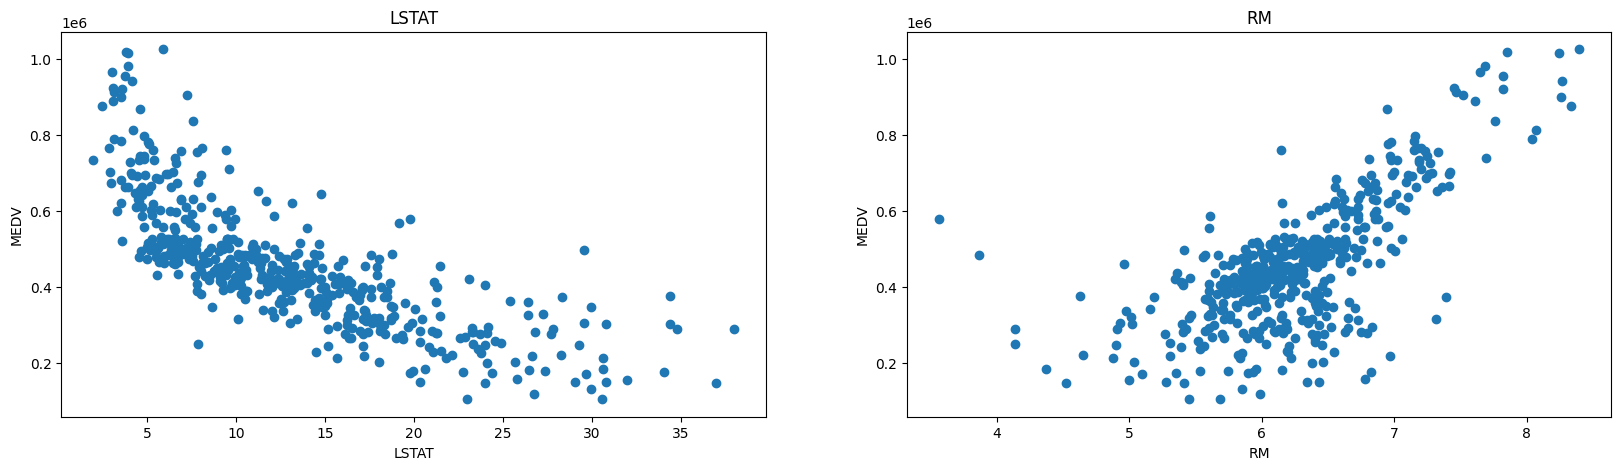

In [8]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Préparation des données pour l'entraînement

---



In [9]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [10]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [11]:
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [12]:
!pip install scikit-learn==1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Fractionnement Entraînement / Test

In [13]:
from sklearn.model_selection import train_test_split

# divise l'ensemble des données en un set d'entraînement et un set de test avec une répartition 90% / 10% (Pas assez de données).
# Attribuez à random_state une valeur quelconque, ce qui assure la cohérence.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(440, 2)
(49, 2)
(440,)
(49,)


In [14]:
X_test.head()

,LSTAT,RM
213,9.71,6.951
485,9.08,6.120
363,17.21,6.968
31,13.04,6.072
234,11.22,6.358


In [15]:
Y_test.head()

213    560700.0
485    432600.0
363    218400.0
31     304500.0
234    466200.0
Name: MEDV, dtype: float64

## Mise à l'échelle des donnéess

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
import pickle

In [34]:
Scaler = scaler.fit(X_train)
with open("/content/drive/MyDrive/Test Pratique-Novalitix AI Lab/Prédiction du Prix des Maisons/scale.pkl", "wb") as file :
  pickle.dump(Scaler, file)

In [35]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modèle

### Création du modèle

In [21]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

### Entraînement du modèle

In [22]:
linear_model.fit(X_train, Y_train)

LinearRegression()

## Évaluation du modèle

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE esst {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE esst 95253.52810253913
le score R2 est 0.6566286847924919


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 100096.03243200682
le score R2 score est 0.706693454702112


## Exportation du modèle pour le déploiement


In [24]:
with open("/content/drive/MyDrive/Test Pratique-Novalitix AI Lab/Prédiction du Prix des Maisons/model.pkl", "wb") as file :
  pickle.dump(linear_model, file)

In [25]:
test_data = [np.array(X_test), np.array(Y_test)]
with open("/content/drive/MyDrive/Test Pratique-Novalitix AI Lab/Prédiction du Prix des Maisons/data.pkl", "wb") as file :
  pickle.dump(test_data, file)